#  Course 6 (Clustering) - Final Project
# Sumukha R 

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Dataset
df = pd.read_excel("Project 6-Segmenting customers into clusters-Dataset.xlsx", parse_dates=["InvoiceDate"])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Checking for null values
df.shape, df.isna().sum()

((541909, 8),
 InvoiceNo           0
 StockCode           0
 Description      1454
 Quantity            0
 InvoiceDate         0
 UnitPrice           0
 CustomerID     135080
 Country             0
 dtype: int64)

## Data Cleaning 

In [4]:
# Dropping CustomerID column as it is unique to each customer
df.drop(columns=["CustomerID"], axis=1, inplace=True)

# Dropping StockCode and Description columns as they are unique identifiers
df.drop(columns=["Description", "StockCode"], axis=1, inplace=True)

# Replacing all numbers in invoice number to either 1 or 0 where 1 represents buy and 0 represents cancellation
df["InvoiceNo"] = df["InvoiceNo"].apply(lambda x: 0 if str(x).startswith("C") else 1).astype(int)

In [5]:
# Extracting date time column
df["day_of_month"] = df["InvoiceDate"].dt.day
df["week_of_month"] = df["InvoiceDate"].dt.week
df["week_of_day"] = df["InvoiceDate"].dt.weekday
df["hour_of_day"] = df["InvoiceDate"].dt.hour
df["month_of_year"] = df["InvoiceDate"].dt.month

# Dropping datetime column
df.drop(columns=["InvoiceDate"], axis=1, inplace=True)

In [6]:
# One hot encoding Country column
# One hot encoding had less error when compared to no country
country_encoded = pd.get_dummies(df["Country"])

# Concat tables and drop feature
df = pd.concat([df, country_encoded], axis=1)
df.drop(columns=["Country"], axis=1, inplace=True)
df.head()

,InvoiceNo,Quantity,UnitPrice,day_of_month,week_of_month,week_of_day,hour_of_day,month_of_year,Australia,Austria,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,1,6,2.55,1,48,2,8,12,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,6,3.39,1,48,2,8,12,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,8,2.75,1,48,2,8,12,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6,3.39,1,48,2,8,12,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,6,3.39,1,48,2,8,12,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# Checking for null values
df.shape, df.isna().sum()

((541909, 46),
 InvoiceNo               0
 Quantity                0
 UnitPrice               0
 day_of_month            0
 week_of_month           0
 week_of_day             0
 hour_of_day             0
 month_of_year           0
 Australia               0
 Austria                 0
 Bahrain                 0
 Belgium                 0
 Brazil                  0
 Canada                  0
 Channel Islands         0
 Cyprus                  0
 Czech Republic          0
 Denmark                 0
 EIRE                    0
 European Community      0
 Finland                 0
 France                  0
 Germany                 0
 Greece                  0
 Hong Kong               0
 Iceland                 0
 Israel                  0
 Italy                   0
 Japan                   0
 Lebanon                 0
 Lithuania               0
 Malta                   0
 Netherlands             0
 Norway                  0
 Poland                  0
 Portugal                0
 RSA         

In [8]:
from sklearn.preprocessing import StandardScaler

# Scaling the dataset to a considerable range
sc = StandardScaler()
cols = df.columns

# Fit and transform
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=cols)
df.head()

,InvoiceNo,Quantity,UnitPrice,day_of_month,week_of_month,week_of_day,hour_of_day,month_of_year,Australia,Austria,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,0.132054,-0.016289,-0.021301,-1.618537,1.140281,-0.233792,-2.078662,1.267257,-0.048256,-0.027213,...,-0.010346,-0.004296,-0.020561,-0.068529,-0.029211,-0.060894,-0.023179,-0.011203,0.30612,-0.0287
1,0.132054,-0.016289,-0.012620,-1.618537,1.140281,-0.233792,-2.078662,1.267257,-0.048256,-0.027213,...,-0.010346,-0.004296,-0.020561,-0.068529,-0.029211,-0.060894,-0.023179,-0.011203,0.30612,-0.0287
2,0.132054,-0.007118,-0.019234,-1.618537,1.140281,-0.233792,-2.078662,1.267257,-0.048256,-0.027213,...,-0.010346,-0.004296,-0.020561,-0.068529,-0.029211,-0.060894,-0.023179,-0.011203,0.30612,-0.0287
3,0.132054,-0.016289,-0.012620,-1.618537,1.140281,-0.233792,-2.078662,1.267257,-0.048256,-0.027213,...,-0.010346,-0.004296,-0.020561,-0.068529,-0.029211,-0.060894,-0.023179,-0.011203,0.30612,-0.0287
4,0.132054,-0.016289,-0.012620,-1.618537,1.140281,-0.233792,-2.078662,1.267257,-0.048256,-0.027213,...,-0.010346,-0.004296,-0.020561,-0.068529,-0.029211,-0.060894,-0.023179,-0.011203,0.30612,-0.0287


# K-Means Clustering

In [9]:
# Importing K Means clustering
from sklearn.cluster import KMeans

# Fit model with random number of clusters - 3
km = KMeans(n_clusters=3, random_state=108, n_jobs=-1)
km.fit(df)

# Predict distribution and inertia
pred = km.predict(df)
print(pd.Series(pred).value_counts().sort_index())
print(f"Inertia: {km.inertia_}")

0     46327
1    294131
2    201451
dtype: int64
Inertia: 23101236.784395933


In [10]:
# Custom loop to estimate elbow curve
Errors = []
for i in range(1, 80, 2):
    km = KMeans(n_clusters = i, random_state=108, n_jobs=-1)
    km.fit(df)
    Errors.append(km.inertia_)

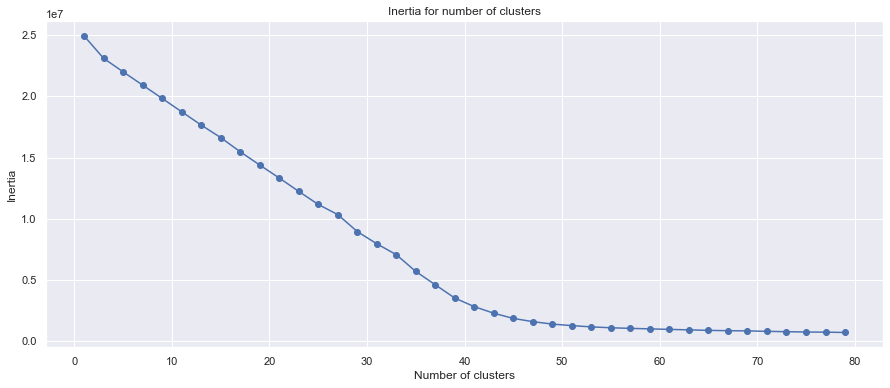

In [11]:
# Plotting the elbow curve
plt.figure(figsize=(15, 6))
plt.plot(range(1, 80, 2), Errors, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Inertia for number of clusters")

plt.show()

From the plot, the best value of k is 44. Meaning, the whole data can be grouped into 44 clusters with different properties.

In [14]:
# Fit model with clusters - 44
km = KMeans(n_clusters=44, random_state=108, n_jobs=-1)
km.fit(df)

# Predict distribution and inertia
pred = km.predict(df)
df["Cluster"] = pred
print(f"Inertia: {km.inertia_}")
df.head()

Inertia: 2101139.3466596245


,InvoiceNo,Quantity,UnitPrice,day_of_month,week_of_month,week_of_day,hour_of_day,month_of_year,Australia,Austria,...,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified,Cluster
0,0.132054,-0.016289,-0.021301,-1.618537,1.140281,-0.233792,-2.078662,1.267257,-0.048256,-0.027213,...,-0.004296,-0.020561,-0.068529,-0.029211,-0.060894,-0.023179,-0.011203,0.30612,-0.0287,41
1,0.132054,-0.016289,-0.012620,-1.618537,1.140281,-0.233792,-2.078662,1.267257,-0.048256,-0.027213,...,-0.004296,-0.020561,-0.068529,-0.029211,-0.060894,-0.023179,-0.011203,0.30612,-0.0287,41
2,0.132054,-0.007118,-0.019234,-1.618537,1.140281,-0.233792,-2.078662,1.267257,-0.048256,-0.027213,...,-0.004296,-0.020561,-0.068529,-0.029211,-0.060894,-0.023179,-0.011203,0.30612,-0.0287,41
3,0.132054,-0.016289,-0.012620,-1.618537,1.140281,-0.233792,-2.078662,1.267257,-0.048256,-0.027213,...,-0.004296,-0.020561,-0.068529,-0.029211,-0.060894,-0.023179,-0.011203,0.30612,-0.0287,41
4,0.132054,-0.016289,-0.012620,-1.618537,1.140281,-0.233792,-2.078662,1.267257,-0.048256,-0.027213,...,-0.004296,-0.020561,-0.068529,-0.029211,-0.060894,-0.023179,-0.011203,0.30612,-0.0287,41


In [13]:
#Agglomerative is highly computational and hence cannot be visualized here#